In [43]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# YOLO Face v2 모델 로드
def load_yolo_model(weights_path, cfg_path):
    net = cv2.dnn.readNet(weights_path, cfg_path)
    model = cv2.dnn.DetectionModel(net)
    model.setInputParams(size=(416, 416), scale=1/255)
    return model

# 얼굴 검출 함수
def detect_faces(image, model):
    classes, scores, boxes = model.detect(image, confThreshold=0.5, nmsThreshold=0.4)
    faces = []
    for (classid, score, box) in zip(classes, scores, boxes):
        x, y, w, h = box
        face = image[y:y+h, x:x+w]
        faces.append(face)
    return faces

In [44]:
# 단계 1: 파일 이름을 기반으로 카테고리 지정
def create_dataframe(data_path):
    filenames = []
    categories = []
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    filenames.append(os.path.join(class_name, img_name))
                    categories.append(class_name)

    df = pd.DataFrame(
        {
            "filename": filenames,
            "category": categories
        }
    )
    return df

root_path = 'D:\\face_data\\'
train_path = os.path.join(root_path, 'Training')
val_path = os.path.join(root_path, 'Validation')

train_df = create_dataframe(train_path)
val_df = create_dataframe(val_path)

print(train_df.head())
print(val_df.head())

                                            filename category
0  기쁨\0de90b7d70454e372b6ed56bdfdba5a10c1036514f6...       기쁨
1  기쁨\0de90b7d70454e372b6ed56bdfdba5a10c1036514f6...       기쁨
2  기쁨\0de90b7d70454e372b6ed56bdfdba5a10c1036514f6...       기쁨
3  기쁨\0de90b7d70454e372b6ed56bdfdba5a10c1036514f6...       기쁨
4  기쁨\0de90b7d70454e372b6ed56bdfdba5a10c1036514f6...       기쁨
                                            filename category
0  기쁨\006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f...       기쁨
1  기쁨\006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f...       기쁨
2  기쁨\006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f...       기쁨
3  기쁨\006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f...       기쁨
4  기쁨\006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f...       기쁨


c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54548 (\N{HANGUL SYLLABLE PEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anacond

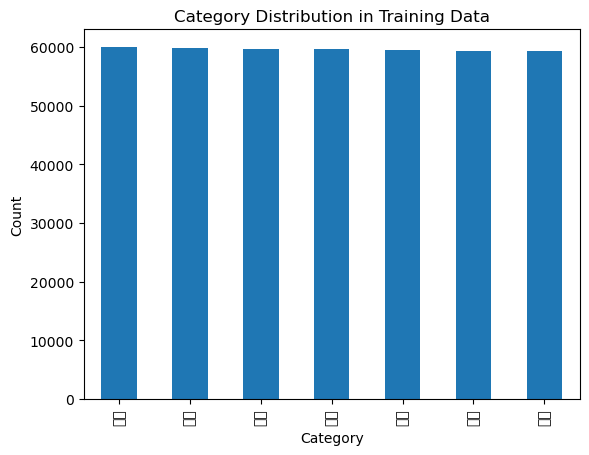

c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54548 (\N{HANGUL SYLLABLE PEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anacond

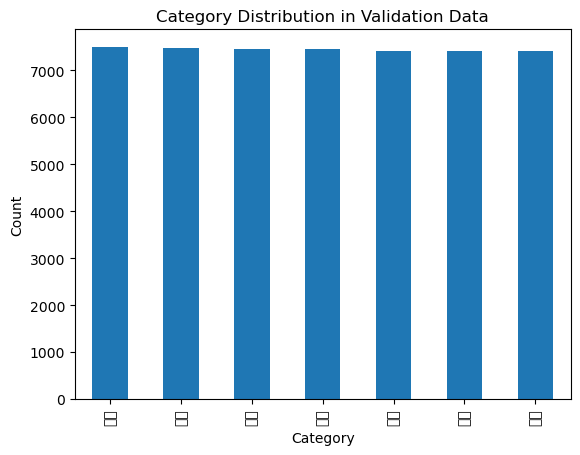

D:\face_data\Training\분노\6bf4bdca7b2b1aa60648e799ed4f90bf2ab74b1f180844ab3f11841052f5c7cf_남_20_분노_숙박 및 거주공간_20210205171412-010-027.jpg


c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49689 (\N{HANGUL SYLLABLE SUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Anaconda3\

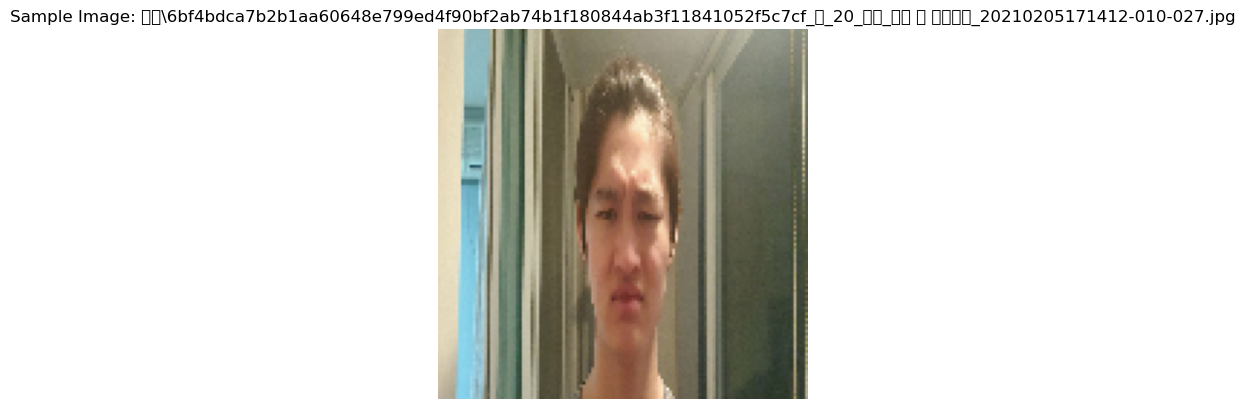

In [45]:
# 카테고리 분포를 막대 그래프로 시각화
train_df['category'].value_counts().plot.bar()
plt.title('Category Distribution in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

val_df['category'].value_counts().plot.bar()
plt.title('Category Distribution in Validation Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 샘플 이미지 표시
sample = random.choice(train_df['filename'])
sample_path = os.path.join(train_path, sample)
print(sample_path)

# 이미지 로드 및 표시
image_load = image.load_img(sample_path, target_size=(128, 128))
plt.imshow(image_load)
plt.title(f'Sample Image: {sample}')
plt.axis('off')  # 축 제거
plt.show()